#                 **TANZANIAN WATER WELLS PREDICTION**

#### Name-Charity Mwangangi
#### Student pace-Part time
#### TM- Maryann Mwikali
#### Phase 3 Project 

## **1.Business understanding Problem and Objective**

### Stateholder:Tanzanian NGO

### **Overview**

#### Tanzania faces significant challenges in providing consistent access to clean water for its citizens. With an estimated population of 70.5 million in mid‑2025, Tanzania remains one of Africa’s fastest-growing nations in terms of population and resource demand.

### **Business problem**
#### The client seeks insights into patterns distinguishing **functional** versus **non-functional or repair-needed wells**, to inform drilling strategies and maintenance priorities. The goal is to help villages avoid prolonged downtime and reduce socio-economic burdens especially on women and children, who are often tasked with collecting water.

### **Project objective**
#### Use the Pump It Up dataset (featuring features like pump type, installation year, payment method, and location) to build a **classification model** that:
#### - Predict well status in a **binary setup**: functional vs. needs attention (repair or non-functional).  
#### -  Identify the key features driving pump failures (e.g., pump type, installation year, management system).

### **Project goal/value**
#### Enables targeted maintenance, directing resources to at-risk wells before they fail.#### Reduces the socioeconomic burden of water insecurity by ensuring greaterhealth, education, and gender equity outcomes.

### **Data source**
#### DrivenData. (2015). Pump it Up: Data Mining the Water Table. Retrieved [Month Day Year] from https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table.




###  2.Data loading and overview
#### 2.1.import libraries
#### These libraries will support data exploration, preprocessing, modeling, and evaluation:


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

#### 2.2 Load dataset

In [2]:
df_labels=pd.read_csv("Dataset/Training set labels.csv")
df_values=pd.read_csv("Dataset/Training set values.csv")

print("Labels:")
display(df_labels.head())

print("\nValues:")
display(df_values.head())

Labels:


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional



Values:


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
#merge the two datasets using id
df = df_values.merge(df_labels, on='id')
display(df.head())
print("Combined shape:", df.shape)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Combined shape: (59400, 41)


In [4]:
#checking columns in our data
df.columns


Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [5]:
#get data type of columns and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [6]:
def data_types(data):

    print("Our dataset has", len( data.select_dtypes(include='number').columns),
                "numeric columns")
    
    print("and", len(data.select_dtypes(include='object').columns),
          "categorical columns")
data_types(df) 

Our dataset has 10 numeric columns
and 31 categorical columns


### 3.1 Data cleaning and Preprocessing


#### a) Duplicates

In [7]:
#checking duplicates using a function
duplicates = []

def check_duplicates(data):

    """Function that iterates through the rows of our dataset to check whether they are duplicated or not"""
    
    for i in data.duplicated():
        duplicates.append(i)
    duplicates_values = set(duplicates)
    if(len(duplicates_values) == 1):
        print('Our Dataset has no Duplicates')

    else:
        duplicates_percentage = np.round(((sum(duplicates)/len(data)) * 100 ), 2)
        print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')
        

check_duplicates(df)

Our Dataset has no Duplicates


#### b) Missing values

In [8]:
#checking missing values
# Get total and percentage of missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

print("Missing values in dataset:")
display(missing_df)



Missing values in dataset:


,Missing Values,Percentage
scheme_name,28166,47.417508
scheme_management,3877,6.526936
installer,3655,6.153199
funder,3635,6.119529
public_meeting,3334,5.612795
permit,3056,5.144781
subvillage,371,0.624579


### Scheme_name and Scheme Management
#### The main objective of this project is to analyze data in order to predict whether water wells in Tanzania are functional or non-functional. The features scheme_name and scheme_management provide information about the names of water supply schemes and their managing entities.However, these features are not expected to be strong predictors of well functionality.
#### In addition, both columns have approximately 47% missing values, which is nearly half of the dataset. Imputing these missing values would not only be difficult but also unlikely to add significant predictive power to the model.
#### Therefore we will drop them.

In [9]:
#dropping scheme name & scheme management.
df.drop(['scheme_name','scheme_management'], axis=1,inplace=True)

In [10]:
#preview shape after dropping
df.shape

(59400, 39)

### Funder
#### The funder feature contains the names of organizations or individuals who contributed to the installation of the wells, which could offer valuable insights for future partnerships and resource allocation.
#### However, this column has approximately 6% missing values. Since the proportion is relatively small and the information could be meaningful, we will drop only the rows with missing values in this column.

### Installer
#### This refers to contractors who are installing the wells.This would contribute much to our stakeholder on the best contractors to work with.
#### The  percentage of the missing values are not much ,we will therefore drop the rows with the missing values only.

### Public Meeting
#### Public meetings are a way of the community to come together and raise issues of concern. We will also just drop missing values of the column.

In [11]:
#drop missing values in funder,installer,public meeting
df = df.dropna(subset=['funder', 'installer', 'public_meeting'])

In [12]:
#preview shape
df.shape

(52576, 39)

## 4.Exploratory Data Analysis (EDA)

### 4.1 Binary Target Variable Creation and Class Distribution
#### To simplify the prediction task, have converted the original status_group target variable into a binary classification problem as per the objectives. Wells labeled as "functional" remain as is, while those labeled as "needs_repair" or "non-functional" were combined into a single "needs_attention" class.

In [13]:
# Create binary target variable
df['status_binary'] = df['status_group'].apply(lambda x: 'functional' if x == 'functional' else 'needs_attention')




#### Class Distribution

Number of wells per class:
functional         28653
needs_attention    23923
Name: status_binary, dtype: int64

Percentage distribution per class:
functional         54.5
needs_attention    45.5
Name: status_binary, dtype: float64


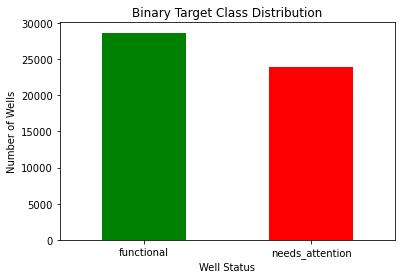

In [14]:
# Count how many rows in each class
class_counts = df['status_binary'].value_counts()
print("Number of wells per class:")
print(class_counts)

# Display the proportion (percentage) per class
class_proportions = df['status_binary'].value_counts(normalize=True) * 100
print("\nPercentage distribution per class:")
print(class_proportions.round(2))

# Plot the class distribution
class_counts.plot(kind='bar', color=['green', 'red'], title='Binary Target Class Distribution')
plt.xlabel('Well Status')
plt.ylabel('Number of Wells')
plt.xticks(rotation=0)
plt.show()

#### The dataset is fairly balanced with respect to the binary target classes:This shows that:
#### About 54.5% of wells are functional
#### About 45.5% need attention
#### This near-even split ensures that our model will have sufficient examples from both classes to learn meaningful patterns, reducing the risk of bias towards the majority class.

### 4.2 **Univariate Analysis (Categorical Features)**
#### Exploring key categorical variables to understand their distributions.

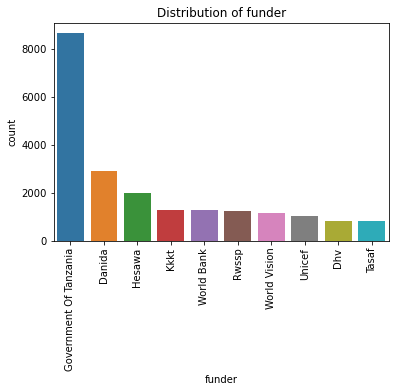

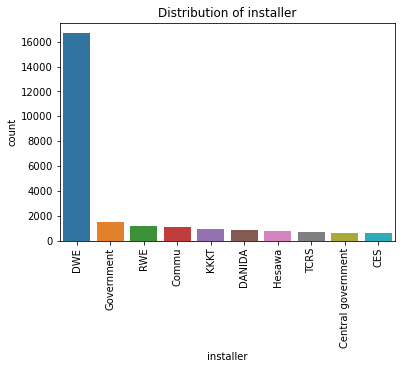

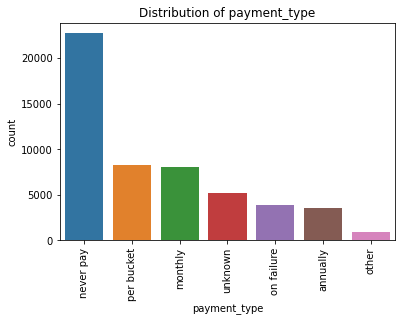

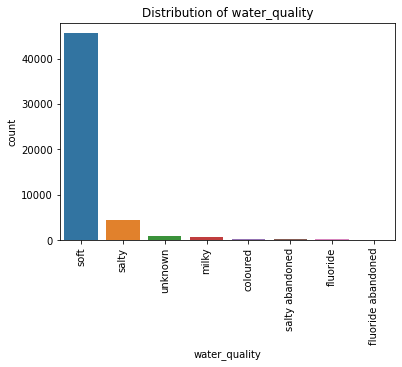

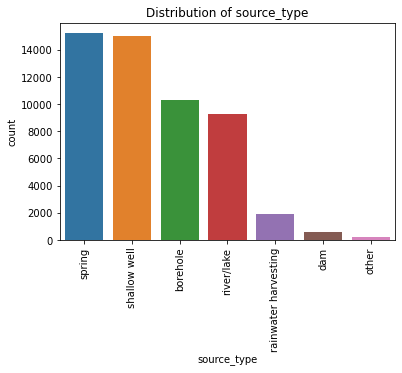

In [16]:

if 'id' in df.columns:
    df = df.drop(columns=['id'])
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in ['funder','installer', 'payment_type', 'water_quality', 'source_type']:
    sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

#### From the visualization of the categorical columns,it is clear that:
#### - **Funder:** Government of Tanzania funds the majority of wells.
#### - **Installer:** DWE is the most frequent installer — their wells' performance may be significant.
#### - **Payment Type:** Most wells are community-funded (free), suggesting non-commercial purpose.
#### - **Water Quality:** Majority use soft water relevant for assessing water safety.
#### - **Source Type:** Shallow wells, springs, and boreholes dominate, potentially influencing functionality.


### 4.3 Distribution of Numerical values
###  Checking outliers 

In [29]:
#checking outliers in numerical data using Interquartile range
#select numerical columns only
numerical_data=df.select_dtypes(include='number')

for col in numerical_data.columns:
    Q1 = numerical_data[col].quantile(0.25)
    Q3 = numerical_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Extract outlier rows
    outliers = df[(numerical_data[col] < lower_bound) | (numerical_data[col] > upper_bound)]

    print(f"Column: {col}")
    if not outliers.empty:
        print(outliers[[col]])
    else:
        print("No outliers found.")
    print("-" * 50)

Column: amount_tsh
       amount_tsh
0          6000.0
11          200.0
16          500.0
19          500.0
20          200.0
...           ...
59378       500.0
59380      6000.0
59385       500.0
59394       500.0
59396      4700.0

[10771 rows x 1 columns]
--------------------------------------------------
Column: gps_height
No outliers found.
--------------------------------------------------
Column: longitude
       longitude
53           0.0
168          0.0
253          0.0
256          0.0
285          0.0
...          ...
59158        0.0
59162        0.0
59189        0.0
59295        0.0
59374        0.0

[1444 rows x 1 columns]
--------------------------------------------------
Column: latitude
No outliers found.
--------------------------------------------------
Column: num_private
       num_private
469           39.0
476            5.0
519           45.0
527            6.0
608            3.0
...            ...
58924          6.0
58943          4.0
58974        120.0
5904

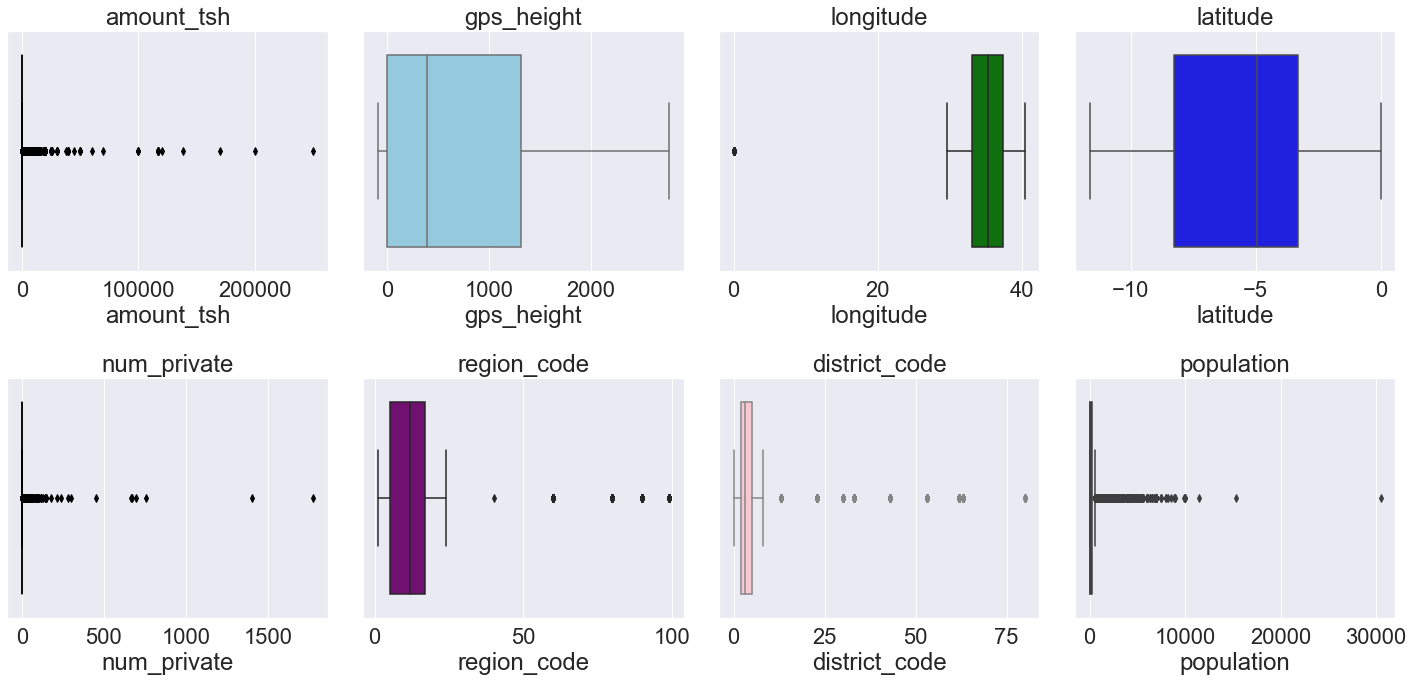

In [40]:
#Visualizating the outliers in our numerical data
def plt_boxplots(data,cols):
    fig, axes =plt.subplots(2,4, figsize=(20,10))
    axes=axes.ravel()
    

    colors=['black','skyblue','green','blue','black','purple','pink','brown','gray']

    for i,col in enumerate(cols[:8]):
        # convert the x-axis variable to a numeric data type
        
        data[col] = data[col].astype(float)
        sns.boxplot(x=data[col], ax=axes[i], color=colors[i])
        
        axes[i].set_title(col)
    plt.tight_layout()
cols = df.select_dtypes(include='number').columns

plt_boxplots(df, cols)



#### as per the visualization we have outliers in all the numerical columns except for the construction year

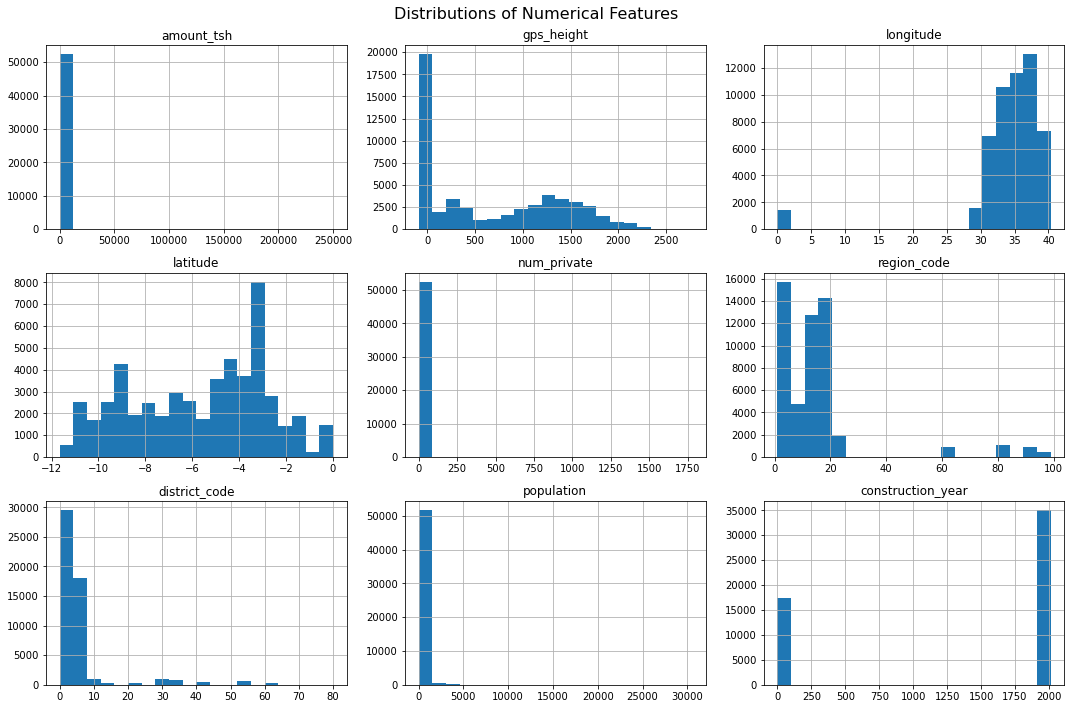

In [32]:

numerical_cols = df.select_dtypes(include='number').columns.tolist()
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


#### From the histograms, we observe that many features have skewed distributions with a heavy concentration of values near zero, especially amount(tsh), population, and num_private. Some features, like gps_height, show a broader distribution, while others like region code appear to be discrete or categorical. This insight suggests we may need to normalize some features and treat zero-heavy or categorical-looking columns differently during modeling

### 4.4 Relationship between Target variable and features

#### Categorical vs Target variable

<ipython-input-55-84b56ad2c0df>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


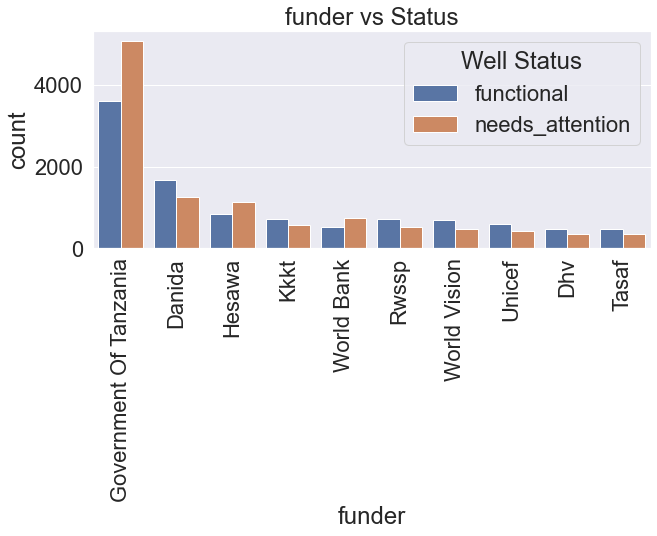

<ipython-input-55-84b56ad2c0df>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


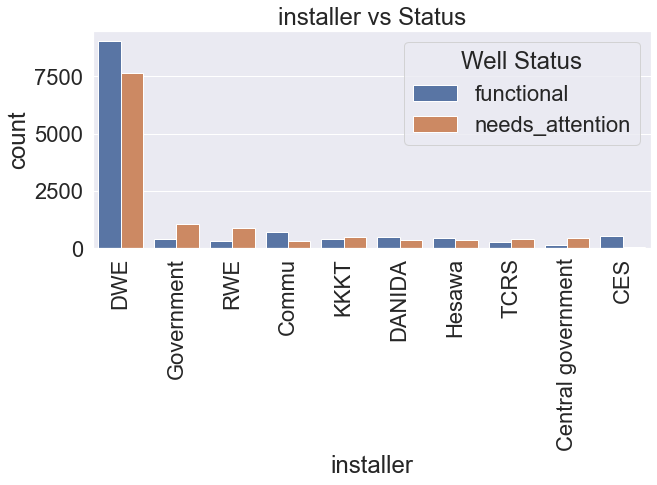

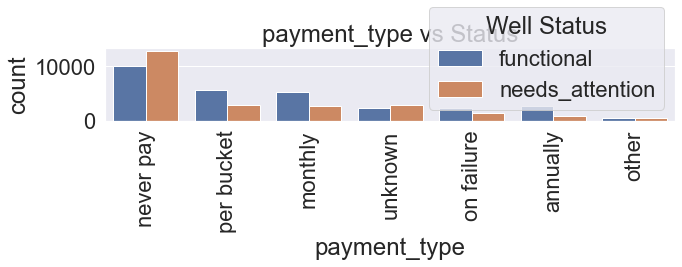

<ipython-input-55-84b56ad2c0df>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


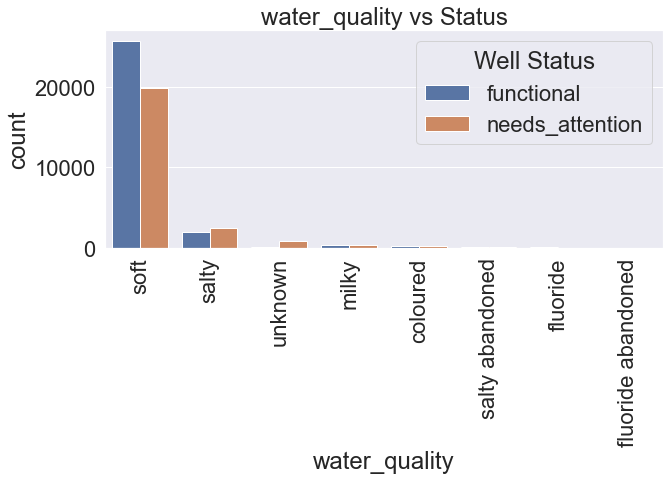

<ipython-input-55-84b56ad2c0df>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


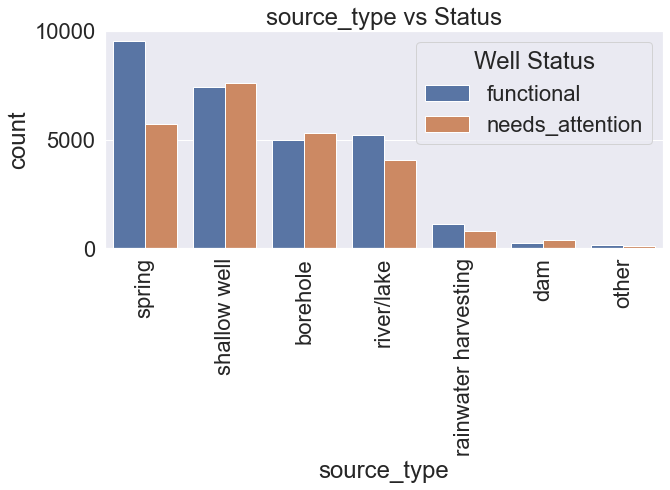

In [55]:
categorical_cols = ['funder', 'installer', 'payment_type', 'water_quality', 'source_type']
# Create subplots: 3 columns per

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, hue='status_binary', order=df[col].value_counts().iloc[:10].index)
    plt.title(f'{col} vs Status')
    plt.xticks(rotation=90)
    plt.legend(title='Well Status')
    plt.tight_layout()
    plt.show()

#### From the visualization relationship between categorical vs target is as follows:
#### **Funder vs status** -Government of Tanzania funds the largest number of wells, but a higher portion of these wells need attention than are functional. Danida, Rwssp, and World Vision show a more balanced distribution, with relatively more functional wellsHesawa, Kkkt, and World Bank have a higher number of wells needing attention.
#### **Installer vs status**-DWE is by far the most common installer, with a large number of wells both functional and needing attention.
#### **Payment vs status**-"Never pay" is the most common and has high failure."Per bucket" and "monthly" payments align more with functional wells, possibly reflecting better maintenance via community investment.
### **water Quality vs Status**-Wells with soft water are more likely to be functional.wells with salty or milky water show higher need for attention.
#### **Source typer vs status** -Spring and river/lake sources show better functionality.Shallow wells and boreholes are more prone to needing attention.

